# Plot books organised by metadata

In [80]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
%matplotlib inline

### Load full texts

Load full texts and put them in dictionaries where the key is the text ID and the value is the corresponding cleaned list of tokens. Since I'm assuming we didn't do OCR, I'm leaving out texts that were scanned.

In [81]:
with open('../Cleaned-Data/cleaned_texts_pdf.json') as json_file:
    cleaned_texts_pdf = json.load(json_file)
with open('../Cleaned-Data/cleaned_texts_epub_txt.json') as json_file:
    cleaned_texts_epub_txt = json.load(json_file)

cln_txts_eu_dict = {}

#the keys in our input json files are file names with extensions. 
#remove extensions so that the dictionary keys match the IDs in the metadata table.
for key, val in cleaned_texts_pdf.items():
    new_key = key.split('.')[0]
    if "scanned" not in new_key:
        cln_txts_eu_dict[new_key] = val
for key, val in cleaned_texts_epub_txt.items():
    new_key = key.split('.')[0]
    if "scanned" not in new_key:
        cln_txts_eu_dict[new_key] = val

with open('../Cleaned-Data/cleaned_texts_dystopia.json') as json_file:
    cleaned_texts_dystopia = json.load(json_file)
    
cln_txts_dys_dict = {}
    
for key, val in cleaned_texts_dystopia.items():
    new_key = key.split('.')[0]
    if "scanned" not in new_key:
        cln_txts_dys_dict[key.split('.')[0]] = val
    
# #uncomment if it's convenient to have a list of the texts
# cln_txts_eu_list = [text for text in cln_txts_eu_dict.values()]
# cln_txts_dys_list = [text for text in cln_txts_dys_dict.values()]

### Load metadata

In [82]:
book_info_eutopia = pd.read_csv("../Biblists/eutopia_september9.csv")
book_info_eutopia = pd.concat([book_info_eutopia, pd.read_csv("../Biblists/bib_list_cdj_july6.csv")], ignore_index=True, verify_integrity = True)

book_info_dystopia = pd.read_csv("../Biblists/dystopia_september18.csv")

del book_info_eutopia['Unnamed: 0']
del book_info_dystopia['Unnamed: 0']

### Clean metadata

Clean it up. Note that the **book ID is a string** not an int and some of them contain 'scanned' (if Jode could only find a scanned copy). Since I'm assuming that we haven't used OCR I'm removing those here.

I'm also removing duplicates based on only a subset of columns. For instance, the metadata table has several entries for ID '4505' which are the same except for the field 'Jode notes'. I'm ignoring that column when looking for duplicates, which means some of Jode's notes may be lost. (But only from the dataframe, of course they are still in the files.)

In [83]:
book_info_eutopia.columns

Index(['author', 'title', 'url', 'ID', 'added', 'jode_notes', 'keywords',
       'abstract', 'address', 'publisher', 'month', 'year', 'howpublished',
       'ENTRYTYPE', 'editor', 'pages', 'isbn', 'note', 'volume', 'issn'],
      dtype='object')

In [84]:
book_info_eutopia = book_info_eutopia[~book_info_eutopia['ID'].isna()]
book_info_eutopia['ID'] = book_info_eutopia.ID.astype('str')
book_info_eutopia.drop_duplicates(inplace = True, subset = ['ID', 'year', 'author', 'title', 'keywords', 'note'])

In [85]:
book_info_eutopia.ID.value_counts()

11187    1
12       1
8054     1
6678     1
31       1
        ..
1865     1
1862     1
1896     1
1902     1
9603     1
Name: ID, Length: 2254, dtype: int64

In [86]:
book_info_dystopia = book_info_dystopia[~book_info_dystopia['ID'].isna()]
book_info_dystopia['ID'] = book_info_dystopia.ID.astype('str')
book_info_dystopia.drop_duplicates(inplace = True, subset = ['ID', 'year', 'author', 'title', 'keywords', 'note'])

In [87]:
book_info_dystopia.ID.value_counts()

11165    1
3277     1
3284     1
3334     1
3305     1
        ..
9332     1
6073     1
6148     1
6081     1
7081     1
Name: ID, Length: 4180, dtype: int64

In [9]:
with open('dystopia_metadata_clean.txt', 'wb') as f:
    pkl.dump(book_info_dystopia, f)
with open('eutopia_metadata_clean.txt', 'wb') as f:
    pkl.dump(book_info_eutopia, f) 


### Functions to filter full texts by metadata

In [88]:
def get_texts_year_range(year_range_lo, year_range_hi, book_info = book_info_eutopia, 
                         text_dict = cln_txts_eu_dict):
    
    ids = book_info[(book_info.year > year_range_lo) & (book_info.year <= year_range_hi)].ID.values
    texts = [text_dict[key] for key in ids if key in text_dict]
    
    print('texts in date range: ' + str(len(texts)))
    return texts
    
def get_texts_w_keyword(kw, book_info = book_info_eutopia, text_dict = cln_txts_eu_dict):
    
    possible_keywords = ['Aotearoa/New Zealand author', 'Female author', 'English author', 'Irish author', 
     'Male author', 'African author', 'Transgender author', 'US author', 'UK author', 
     'Canadian author', 'Latinx author', 'African American author', 'Cuban-American author',
     'Scottish author', 'Indian author', 'French author', 'Australian author', 
     'Czech author', 'Northern Ireland author', 'Israeli author', 'Nigerian author', 
     'South African author', 'Iranian author', 'Botswanan author', 'Armenian author', 
     'Italian author', 'German author', 'Welsh author', 'Slovenian author']
        
    if kw not in possible_keywords:
        print('no texts labeled with that keyword. possible keywords are:')
        print(possible_keywords)

    bi_no_na = book_info[~book_info.keywords.isna()]
    ids = bi_no_na[bi_no_na.keywords.str.contains(kw)].ID.values
    texts = [text_dict[key] for key in ids if key in text_dict]

    print('texts with keyword ' + kw + ': ' + str(len(texts)))
    return texts

    pd.Series.dropna
    book_info.keywords.dropna()

In [89]:
f_auth_texts = get_texts_w_keyword('Female author')

texts with keyword Female author: 154


In [11]:
m_auth_texts = get_texts_w_keyword('Male author')

texts with keyword Male author: 533


In [12]:
early_scifi = get_texts_year_range(1700, 1850)

texts in date range: 50


In [13]:
romantic_scifi = get_texts_year_range(1850, 1900)

texts in date range: 197


In [14]:
ww_scifi = get_texts_year_range(1900, 1945)

texts in date range: 196


In [15]:
coldwar_scifi = get_texts_year_range(1945, 1990)

texts in date range: 125


In [16]:
contemp_scifi = get_texts_year_range(1990, 2022)

texts in date range: 143


## Doc2Vec Model

In [17]:
import gensim

In [18]:
taggedDocs = []

In [19]:
all_texts = list(cln_txts_eu_dict.values())

In [20]:
len(all_texts)

721

In [21]:
i = 0

In [22]:
for text in all_texts:
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = text, tags = [i]))
    i +=1

In [70]:
def text_lengths():
    text_lens 

In [90]:
doc2vec_model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40)

In [91]:
doc2vec_model.build_vocab(taggedDocs)

In [92]:
doc2vec_model.train(taggedDocs, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

## Visualisations

In [93]:
def vecs_labels(texts, label):
    vecs = []
    labels = []
    for text in texts:
        vecs.append(doc2vec_model.infer_vector(text))
        labels.append(label)
    vecs = np.array(vecs).reshape(len(labels), 100)
    return vecs, labels

In [94]:
early_vecs, early_labels = vecs_labels(early_scifi, "Early")

In [95]:
romantic_vecs, romantic_labels = vecs_labels(romantic_scifi, "Romantic")

In [96]:
ww_vecs, ww_labels = vecs_labels(ww_scifi, "World War")

In [97]:
coldwar_vecs, coldwar_labels = vecs_labels(coldwar_scifi, "Cold War")

In [98]:
contemp_vecs, contemp_labels = vecs_labels(contemp_scifi, "Contemp")

In [ ]:
v = np.concatenate((early_vecs, romantic_vecs, ww_vecs, coldwar_vecs, contemp_vecs), axis=0)

In [ ]:
v

In [ ]:
male_vecs, male_labels = vecs_labels(m_auth_texts, "Male")

In [ ]:
female_vecs, female_labels = vecs_labels(f_auth_texts, "Female")

In [ ]:
from yellowbrick.text import TSNEVisualizer, UMAPVisualizer

In [ ]:
umap = UMAPVisualizer()

In [ ]:
male_vecs[0:3]

In [78]:
import umap

In [79]:
import umap.plot


In [92]:
mapper = umap.UMAP().fit(np.append(male_vecs, female_vecs, axis=0))

<AxesSubplot:>

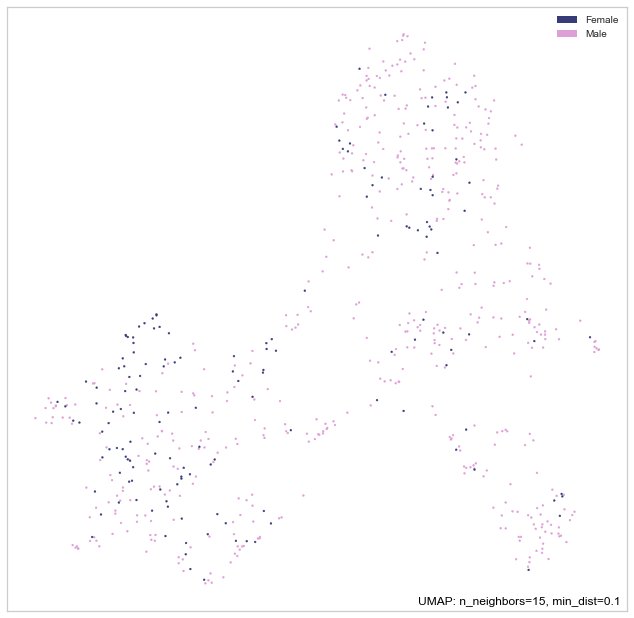

In [96]:
umap.plot.points(mapper, labels = np.array(male_labels + female_labels), theme='red')

In [74]:
umap.fit(np.append(male_vecs, female_vecs, axis=0), male_labels + female_labels)
umap.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'UMAP Projection of 687 Documents'}>

In [100]:
mapper = umap.UMAP().fit(np.concatenate((early_vecs, romantic_vecs, ww_vecs, coldwar_vecs, contemp_vecs), axis=0))

<AxesSubplot:>

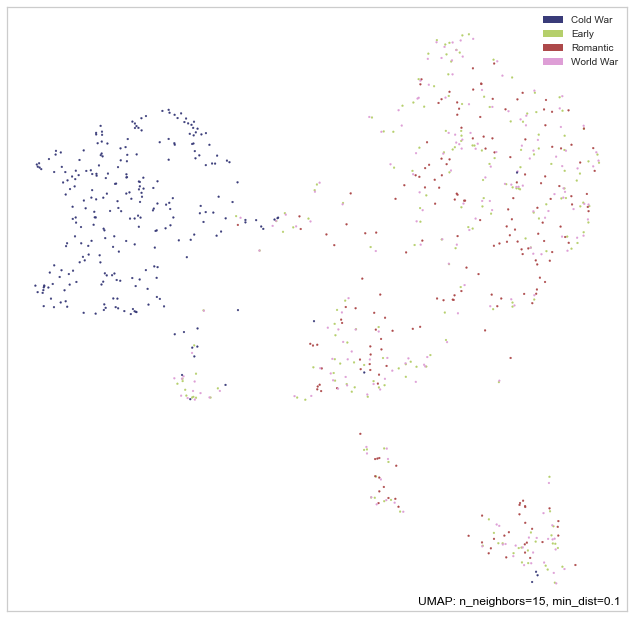

In [101]:
umap.plot.points(mapper, labels = np.array(early_labels + romantic_labels + ww_labels + coldwar_labels + contemp_labels), theme='red')

In [35]:
from yellowbrick.text import TSNEVisualizer, UMAPVisualizer

In [36]:
umap_model = UMAPVisualizer()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


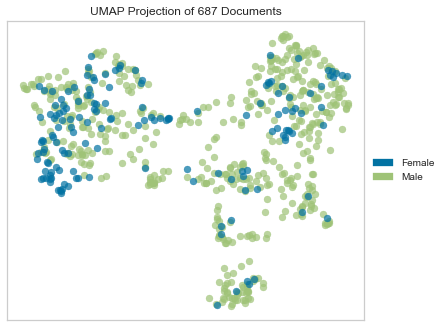

<AxesSubplot:title={'center':'UMAP Projection of 687 Documents'}>

In [105]:
umap_model.fit(np.append(male_vecs, female_vecs, axis=0), male_labels + female_labels)
umap_model.show()

In [105]:
umap_model = UMAPVisualizer()

In [99]:
labels = np.array(early_labels + romantic_labels + ww_labels + coldwar_labels + contemp_labels)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<AxesSubplot:title={'center':'UMAP Projection of 711 Documents'}>

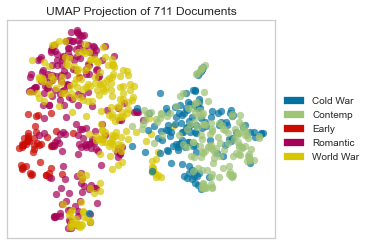

In [106]:
umap_model.fit(np.concatenate((early_vecs, romantic_vecs, ww_vecs, coldwar_vecs, contemp_vecs), axis=0), labels)
umap_model.show(outpath="100_dimensions.pdf")

In [4]:
umap_model = UMAPVisualizer()

In [118]:
labels = np.array(coldwar_labels + contemp_labels)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


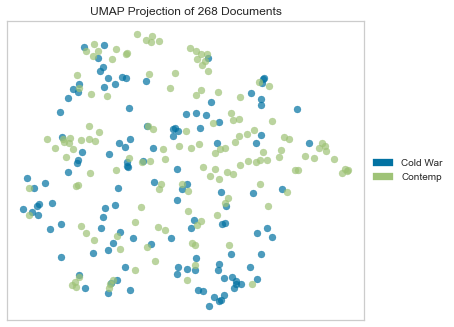

<AxesSubplot:title={'center':'UMAP Projection of 268 Documents'}>

In [119]:
umap_model.fit(np.concatenate((coldwar_vecs, contemp_vecs), axis=0), labels)
umap_model.show()

In [129]:
umap_model = UMAPVisualizer()

In [130]:
labels = np.array(ww_labels + romantic_labels)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


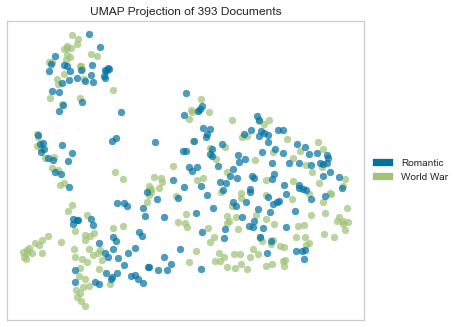

<AxesSubplot:title={'center':'UMAP Projection of 393 Documents'}>

In [131]:
umap_model.fit(np.concatenate((ww_vecs, romantic_vecs), axis=0), labels)
umap_model.show()

In [126]:
umap_model = UMAPVisualizer()

In [127]:
labels = np.array(coldwar_labels + contemp_labels + ww_labels + romantic_labels)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

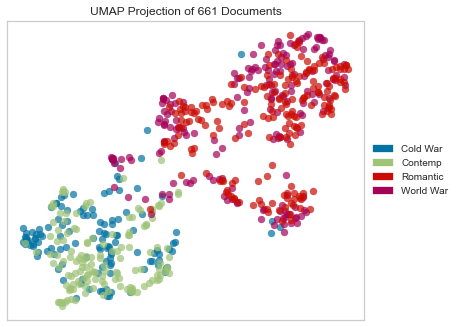

<AxesSubplot:title={'center':'UMAP Projection of 661 Documents'}>

In [128]:
umap_model.fit(np.concatenate((coldwar_vecs, contemp_vecs, ww_vecs, romantic_vecs), axis=0), labels)
umap_model.show()

Microgenres: the language of cybernetics and computation
Analog vs Digital words (throw stop words and most commonly used words)
Technology based words - technology, 

### Descriptive statistics of Lyman Tower Sargent bibliography and our corpus

In [14]:
our_book_info_eutopia = book_info_eutopia[book_info_eutopia.ID.isin([key for key in cln_txts_eu_dict.keys()])]
our_book_info_topia = book_info_dystopia[book_info_dystopia.ID.isin([key for key in cln_txts_dys_dict.keys()])]

In [21]:
# len(eu_corpus)

Time

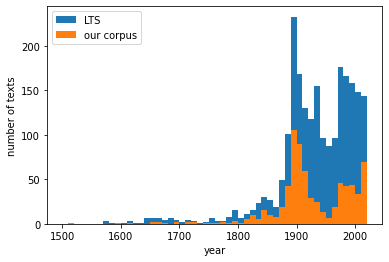

In [16]:
plt.hist(book_info_eutopia.year.values, bins = np.arange(1500, 2021, 10), label = 'LTS')
plt.hist(our_book_info_eutopia.year.values, bins = np.arange(1500, 2021, 10), label = 'our corpus')
plt.xlabel('year')
plt.ylabel('number of texts')
plt.legend()

In [17]:
#categorize keywords.
#I constructed these so that each group would only contain mutually exclusive kws.
#(not as in I believe them to be exclusive, but as in I don't expect the same work to be tagged with more than one)
#I need to double-check this is true in the data.

gender_kws = ['Female author', 'Male author']
trans_kws = ['Transgender author']
nation_kws = ['Aotearoa/New Zealand author', 'English author', 'Irish author',  
              'US author', 'UK author', 'Canadian author', 'Latinx author', 'Scottish author', 
              'Indian author', 'French author', 'Australian author', 'Czech author', 'Northern Ireland author', 
              'Israeli author', 'Nigerian author', 'South African author', 'Iranian author', 'Botswanan author', 
              'Armenian author', 'Italian author', 'German author', 'Welsh author', 'Slovenian author']

continent_kws = ['African author']

us_minority_kws = ['Cuban-American author', 'African American author']

In [18]:
def get_n_with_kw(book_info_in, kw):
    
    book_info = book_info_in[~book_info_in.keywords.isna()]

    return len(book_info[book_info.keywords.str.contains(kw)])

def get_kw_distribution(kw_list, book_info):

    kw_numbers = {}
    for kw in kw_list:
        kw_numbers[kw] = get_n_with_kw(book_info, kw)
    kw_numbers['None'] = len(book_info) - sum(val for val in kw_numbers.values())
    
    print(kw_numbers)
    return kw_numbers

def plot_pie(ax, kw_list, book_info):
    
    data = get_kw_distribution(kw_list, book_info)
    
    ax.pie([v for v in data.values()], labels = [k for k in data.keys()])
    

In [19]:
plot_pie(gender_kws, book_info_eutopia)
plt.title('LST eutopia')

TypeError: plot_pie() missing 1 required positional argument: 'book_info'

In [20]:
plot_pie(gender_kws, our_book_info_eutopia)
plt.title('our eutopia')

TypeError: plot_pie() missing 1 required positional argument: 'book_info'

In [ ]:
# fig, ax = plt.subplots(5, 2)

# for i, kw_list in enumerate([gender_kws, trans_kws, continent_kws, us_minority_kws]): #nation_kws, 
#     for j, bi in enumerate([book_info_eutopia, our_book_info_eutopia]):
#         plot_pie(ax[i, j], kw_list, bi)